In [1]:
from IPython import display

from matplotlib import pyplot as plt

import numpy as np
import scipy.signal as sps

import letalker as sv
from letalker.constants import fs, male_vf_params
import ffmpegio as ff


N = fs

t = np.arange(N) / fs

vf_params = {
    **male_vf_params,
    # "xi0": None,  # prephonatory displacements of the edge of the vf at the level of the vocal process
    # "xim": 0.1,  # common amplitude of the upper and lower edges of the folds
    # "Qa": 0.5,  # abduction quotient: xi02/xim (Titze 84 Eq (8))
    # "Qs": 3.0,  # shape quotient: (xi01-xi02)/xim (Titze 84 Eq (9))
    # "Qp": 0.2,  # phase quotient: phi/2pi (Titze 84 Eq (10))
    # "Qb": 1.0,  # bulging quotient: (|xi01-xi02|/2-(xib-xi02))/xim
}

fo = 101

psd_level = sv.LeTalkerAspirationNoise.psd_level / 10

# psd_level / 50
b, a = sps.bilinear(
    *sps.butter(2, [300 * 2 * np.pi, 3000 * 2 * np.pi], btype="band", analog=True),
    fs,
)
noise_source = sv.ColoredNoiseGenerator(b, a, psd_level=psd_level)

lips, vf, lip_nout, vf_hout, lungs = sv.sim_dual_kinematic(
    N,
    fo,
    **vf_params,
    vocaltract={"areas": "aa", "atten": 0.0015},
    trachea={"atten": 0.0015},
    aspiration_noise=True,  # {"noise_source": noise_source},
)

AttributeError: type object 'LeTalkerAspirationNoise' has no attribute 'psd_level'

1.5640702535605664


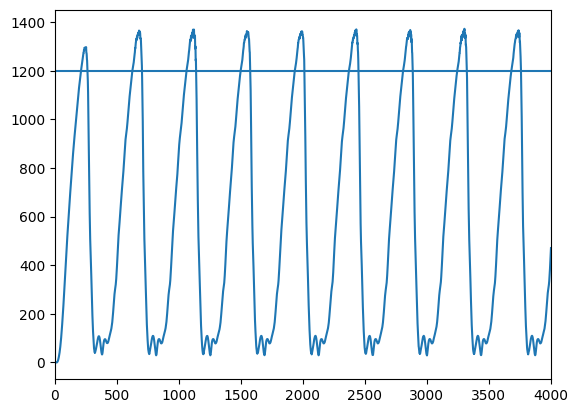

In [ ]:
plt.plot(vf.aspiration_noise.re)
plt.axhline(vf.aspiration_noise.re_b[0])
plt.xlim(0, 4000)
print(vf.length)

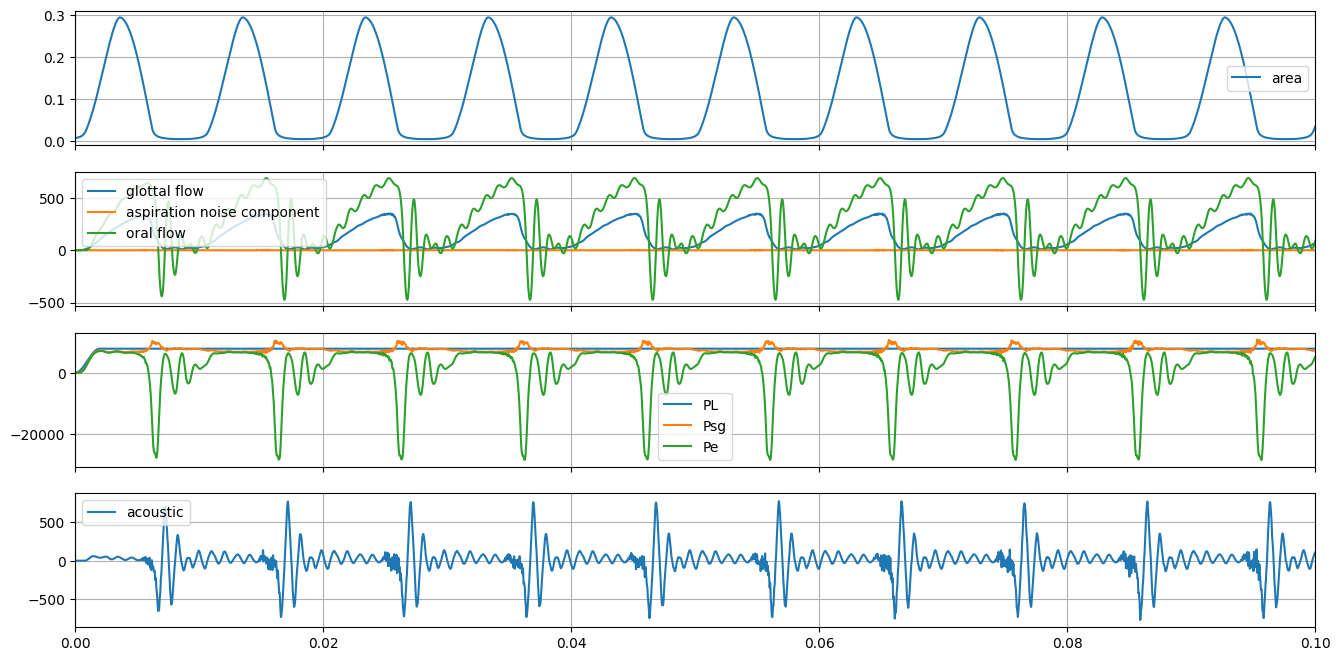

In [ ]:
po_harmonics = lips.pout
po_noise = lip_nout.pout
x = po_harmonics + po_noise

plt.subplots(4, 1, sharex=True, figsize=(16, 8))
plt.subplot(4, 1, 1)
plt.plot(t, vf.glottal_area, label="area")
plt.grid()
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(t, vf.ug, label="glottal flow")
plt.plot(t, vf.aspiration_noise.unoise, label="aspiration noise component")
plt.plot(t, lips.uout, label="oral flow")
plt.grid()
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(t, lungs.plung, t, vf.psg, t, vf.peplx)
plt.legend(["PL", "Psg", "Pe"])
plt.grid()
plt.subplot(4, 1, 4)
plt.plot(t, x, label="acoustic")
plt.grid()
plt.legend()
plt.xlim(0, 0.1)
# # if vf.noise_gen:
# #     nfft = round(2 ** np.ceil(np.log2(N)))
# #     plt.figure()
# #     plt.plot(vf.ug * vf.noise_gen.nu_inv / vf.L)
# #     plt.axhline(np.sqrt(vf.noise_gen.RE2b))
# plt.show()
display.display(display.Audio(data=po_harmonics, rate=fs))
display.display(display.Audio(data=x, rate=fs))